In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, precision_score, classification_report

import random
random.seed(78)


In [2]:
train = pd.read_pickle('train_processed.pkl')
train

,note,avis_length,maj_pourcentage,exclam_pourcentage,max_maj_in_a_row,max_exclam_in_a_row,0_word,00_word,000_word,0000_word,...,produit_credit,produit_flotte-automobile,produit_garantie-decennale,produit_habitation,produit_moto,produit_multirisque-professionnelle,produit_prevoyance,produit_responsabilite-civile-professionnelle,produit_sante,produit_vie
0,4,156.0,0.016260,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3,267.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4,167.0,0.007299,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,155.0,0.008264,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,720.0,0.009042,0.009042,1.0,3.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24100,0,435.0,0.025316,0.009494,5.0,1.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
24101,0,207.0,0.030675,0.000000,2.0,0.0,0.0,0.073167,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
24102,0,1881.0,0.054490,0.001535,10.0,1.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
24103,2,650.0,0.004016,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = train.drop(['avoir_word'], axis = 1)
train = train.drop(['être_word'], axis = 1)
# train = train.drop(['exclam_pourcentage'], axis = 1)
# train = train.drop(['maj_pourcentage'], axis = 1)

In [4]:
from sklearn.model_selection import train_test_split

train = train.sample(frac=1).reset_index(drop=True)
X = train.drop(['note'],axis=1)   # independant features
y = train['note']					# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

In [9]:
d_train = lgb.Dataset(X_train, label=y_train) #Load in data


In [6]:
count = 0 #Used for keeping track of the iteration number
#How many runs to perform using randomly selected hyperparameters
iterations = 1
best_MSE_score = 1000
best_epoch = 50
for i in range(iterations):
    print('iteration number', count)
    count += 1 #increment count
    try:
        d_train = lgb.Dataset(X_train, label=y_train) #Load in data
        params = {} #initialize parameters

        params['learning_rate'] = np.random.uniform(0.06, 0.3)
        params['boosting_type'] = np.random.choice(['gbdt', 'dart'])
        params['objective'] = 'multiclass'
        params['metric'] = 'multi_logloss'
        params['num_class']= 5 #no.of unique values in the target class not inclusive of the end value
        params['sub_feature'] = np.random.uniform(0, 1)
        params['num_leaves'] = np.random.randint(20, 300)
        params['min_data'] = np.random.randint(10, 100)
        params['max_depth'] = np.random.randint(5, 200)
        params['verbose'] = -1
        epoch = np.random.randint(20, 100)
        print(params, epoch)
        #Train using selected parameters
        clf = lgb.train(params, d_train, epoch)
        y_pred=clf.predict(X_test) #Create predictions on test set
        #argmax() method 
        y_pred = [np.argmax(line) for line in y_pred]
        MSE_score=mean_squared_error(y_pred,y_test)
        print('MSE:', MSE_score)
        if MSE_score < best_MSE_score:
            best_MSE_score = MSE_score
            best_params = params
            best_epoch = epoch
    except: #in case something goes wrong
        print('failed with')
        print(params)
print("*" * 50)
print('Minimum is: ', best_MSE_score)
print('Used params', best_params)

iteration number 0
{'learning_rate': 0.19505298343335944, 'boosting_type': 'dart', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_class': 5, 'sub_feature': 0.1420660224238559, 'num_leaves': 286, 'min_data': 47, 'max_depth': 151, 'verbose': -1} 73
MSE: 2.127903761061947
**************************************************
Minimum is:  2.127903761061947
Used params {'learning_rate': 0.19505298343335944, 'boosting_type': 'dart', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_class': 5, 'sub_feature': 0.1420660224238559, 'num_leaves': 286, 'min_data': 47, 'max_depth': 151, 'verbose': -1}


Let's focus on our best model :

In [10]:
best_params = {'learning_rate': 0.15094228842777963,'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_class': 5, 'sub_feature': 0.6058784215250052, 'num_leaves': 65, 'min_data': 28, 'max_depth': 51, 'verbose': -1}
best_epoch = 49

In [11]:
print(best_params, best_epoch)
#Train using selected parameters
clf = lgb.train(best_params, d_train, best_epoch)
y_pred=clf.predict(X_test) #Create predictions on test set
#argmax() method 
y_pred = [np.argmax(line) for line in y_pred]

print('Précision du meilleur modèle : ', precision_score(y_pred,y_test,average=None).mean())
print('MSE du meilleur modèle : ', mean_squared_error(y_pred,y_test))
print('RMSE du meilleur modèle : ', mean_squared_error(y_pred,y_test, squared=False))
print(classification_report([x+1 for x in y_test], [x+1 for x in y_pred]))

{'learning_rate': 0.15094228842777963, 'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss', 'num_class': 5, 'sub_feature': 0.6058784215250052, 'num_leaves': 65, 'min_data': 28, 'max_depth': 51, 'verbose': -1} 49
Précision du meilleur modèle :  0.35804360414250264
MSE du meilleur modèle :  1.9529867256637168
RMSE du meilleur modèle :  1.3974930145312774
              precision    recall  f1-score   support

           1       0.54      0.78      0.64      2142
           2       0.28      0.11      0.16      1149
           3       0.18      0.07      0.10      1012
           4       0.36      0.39      0.38      1483
           5       0.37      0.44      0.40      1446

    accuracy                           0.43      7232
   macro avg       0.35      0.36      0.34      7232
weighted avg       0.38      0.43      0.39      7232



[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5')]

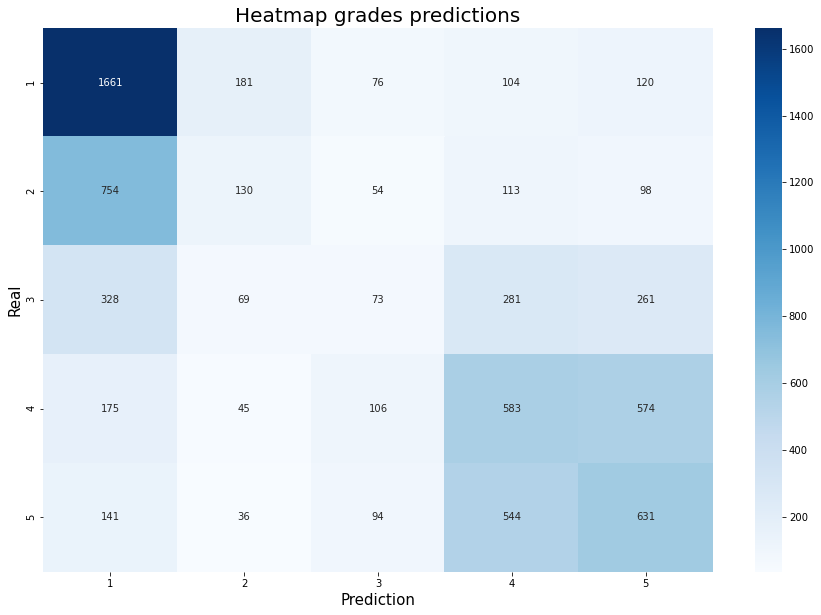

In [21]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(15,10)) 

cm = confusion_matrix([x+1 for x in y_test], [x+1 for x in y_pred])
sns.heatmap(cm, cmap = "Blues", annot=True, fmt="d")
plt.title('Heatmap grades predictions', fontsize = 20) # title with fontsize 20
plt.xlabel('Prediction', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Real', fontsize = 15) # y-axis label with fontsize 15
ax.set_xticklabels([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

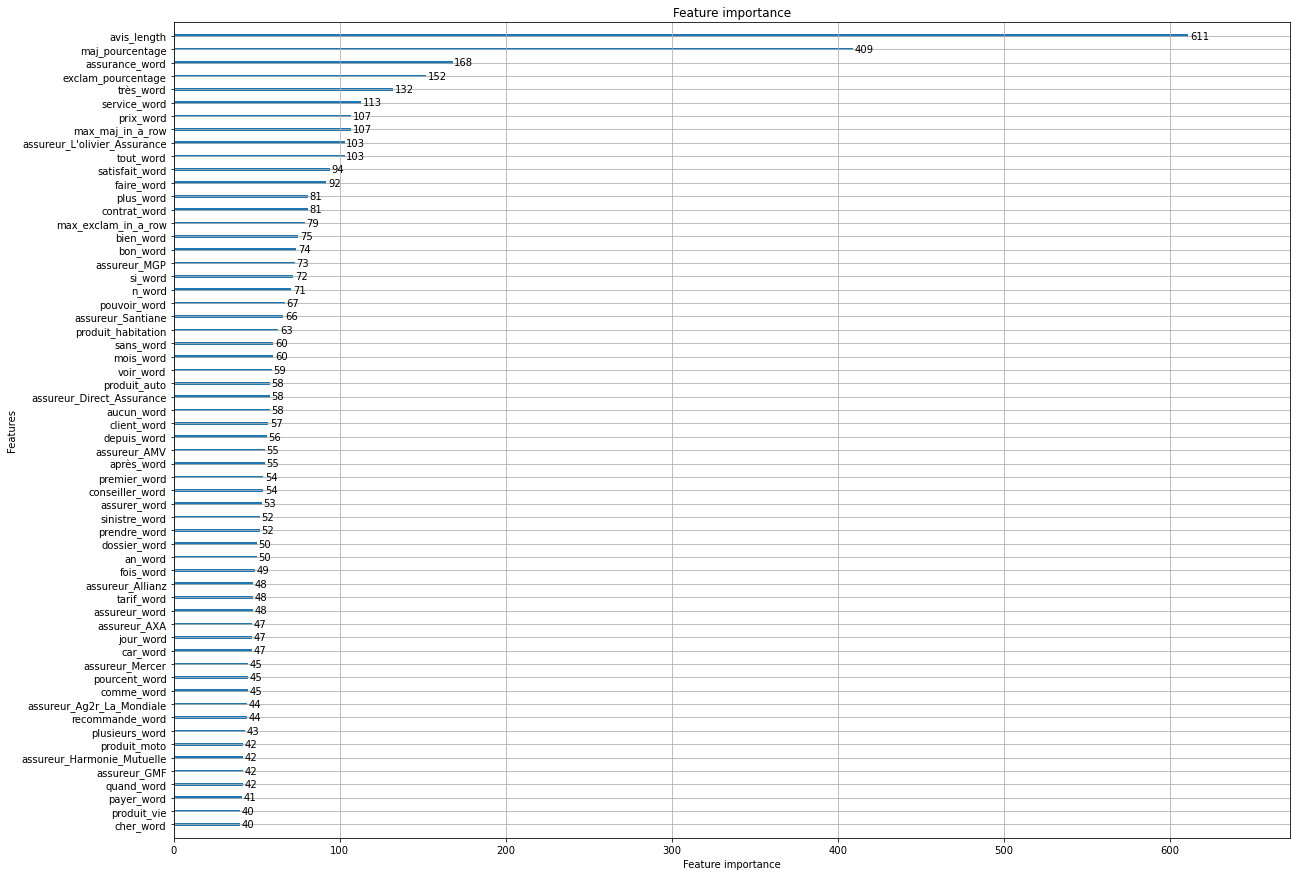

In [13]:
lgb.plot_importance(clf, max_num_features = 60, figsize=(20,15))

Version de heatmap simplifiée

[Text(0, 0.5, 'Bad'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Good')]

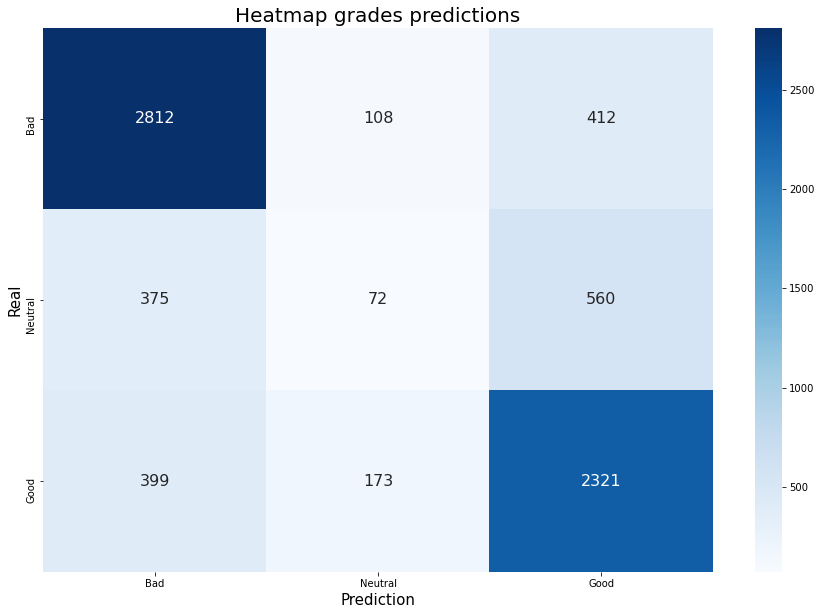

In [25]:
reduced_conf = np.array([[2812,108,412],[375,72,560],[399,173,2321]])

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(reduced_conf, cmap = "Blues", annot=True, fmt="d", annot_kws={"size":16})
plt.title('Heatmap grades predictions', fontsize = 20) # title with fontsize 20
plt.xlabel('Prediction', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Real', fontsize = 15) # y-axis label with fontsize 15
ax.set_xticklabels(['Bad','Neutral','Good'])
ax.set_yticklabels(['Bad','Neutral','Good'])

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5')]

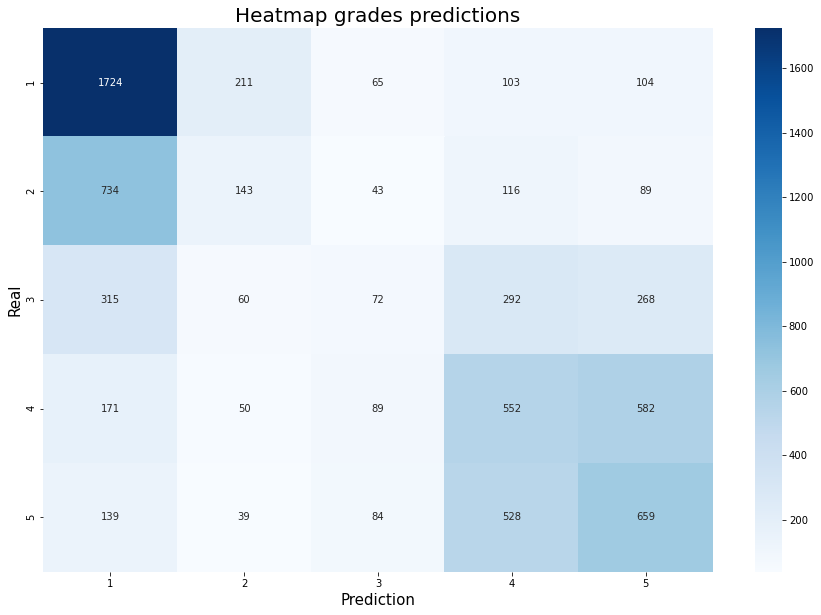

In [23]:
best_conf = np.array([[1724,211,65,103,104],[734,143,43,116,89],[315,60,72,292,268],[171,50,89,552,582],[139,39,84,528,659]])

fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(best_conf, cmap = "Blues", annot=True, fmt="d")
plt.title('Heatmap grades predictions', fontsize = 20) # title with fontsize 20
plt.xlabel('Prediction', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Real', fontsize = 15) # y-axis label with fontsize 15
ax.set_xticklabels([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])